In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Alpha synuclein Log transformed.xlsx to Alpha synuclein Log transformed.xlsx


In [4]:
# STEP 3: Load data
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, sheet_name='Sheet1')
# Clean DataFrame column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

In [5]:
# STEP 4: Define numeric columns explicitly
numeric_columns = ['WT_D1_1', 'WT_D1_2', 'WT_D10_1', 'WT_D10_2', 'WT_D30_1', 'WT_D30_2', 'A30P_D1_1', 'A30P_D1_2', 'A30P_D10_1', 'A30P_D10_2', 'A53T_D1_1', 'A53T_D1_2', 'A53T_D10_1', 'A53T_D10_2', 'A53T_D30_1', 'A53T_D30_2']

In [6]:
df.dropna(inplace = True)
print(df.shape)

(1198, 17)


In [7]:
df


,Gene ID,WT_D1_1,WT_D1_2,WT_D10_1,WT_D10_2,WT_D30_1,WT_D30_2,A30P_D1_1,A30P_D1_2,A30P_D10_1,A30P_D10_2,A53T_D1_1,A53T_D1_2,A53T_D10_1,A53T_D10_2,A53T_D30_1,A53T_D30_2
2562,MRP,-1.451149,-1.662734,-1.467294,-1.148289,1.239215,-0.495064,-1.973072,-1.703173,-1.702985,-2.075034,-1.349015,-1.510128,-1.750203,-2.264998,-1.530531,-1.745067
2564,Ide,-1.235212,-2.375871,-2.418041,-1.699419,0.253868,-1.537508,-2.214843,-2.918988,-1.476017,-2.215111,-1.981708,2.072003,-2.143628,-1.832334,-2.129608,-2.192645
2568,Cyp313a1,-0.691802,-0.833079,-1.602088,-1.411733,0.993421,-1.288699,-1.675627,1.259062,-2.312868,-2.257459,-1.632539,-1.020545,-1.881561,-1.377032,-0.858253,-1.396726
2571,AIF,-2.020048,-1.559877,-0.697102,-0.807074,-0.323173,-1.867594,-1.921281,-1.780612,-1.698061,-1.961058,-0.771963,-0.937326,0.680954,-1.916262,-2.103147,-2.137394
2574,Dlic,-1.566058,-1.231346,-1.228909,-1.499810,0.225398,-1.323913,-1.431404,-1.966743,-1.354575,-1.399312,-1.170004,-1.021482,-1.333116,-1.771027,-1.475976,-1.465540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,bsf,-2.865542,-2.911370,-2.071633,-2.158751,-1.854805,-1.804451,-2.845598,-2.752243,-1.977554,-1.949812,-2.038717,-3.032212,-2.395397,-1.958252,-0.117740,-1.978634
4423,Yp3,2.066847,2.026906,-0.314607,-0.321099,-0.846428,-0.910854,0.919302,0.716684,-0.335954,-0.296775,1.115100,0.915100,0.177726,0.082566,0.902730,0.757194
4429,Usp7,-1.677010,-2.070542,-1.961789,-1.953383,-2.385187,-1.118038,-2.645119,-1.308859,-2.134477,-1.697968,-1.877261,-0.962238,-1.931536,-1.724611,0.093154,-1.275332
4430,Aats-his,-1.323805,-1.671393,-0.775441,-0.949227,-1.156724,-1.075398,-1.364348,-1.976305,-1.202970,-1.173840,-1.890145,-2.204898,-1.420472,-1.337630,2.648834,-1.484954


In [8]:
# STEP 5: Transpose the data (rows = samples, columns = metabolites)
# Clean up numeric_columns by stripping whitespace from each column name
cleaned_numeric_columns = [col.strip() for col in numeric_columns]
transposed_data = df[cleaned_numeric_columns].T
transposed_data.columns = df['Gene ID']  # Optional: set metabolite names as column headers

In [32]:
# STEP 6: Create labels for coloring and text annotation
# Original sample names corresponding to the transposed rows
original_sample_names = ['WT_D1_1', 'WT_D1_2', 'WT_D10_1', 'WT_D10_2', 'WT_D30_1', 'WT_D30_2', 'A30P_D1_1', 'A30P_D1_2', 'A30P_D10_1', 'A30P_D10_2', 'A53T_D1_1', 'A53T_D1_2', 'A53T_D10_1', 'A53T_D10_2', 'A53T_D30_1', 'A53T_D30_2']

# Labels for coloring (e.g., 'WT', 'A30P', 'A53T')
group_labels = []
for name in original_sample_names:
    group_labels.append(name.split('_')[0].strip())

# Labels for text annotation on the plot (e.g., 'WT_D1_1','WT_D1_2', 'WT_D10_1')
point_labels = original_sample_names

In [33]:
# STEP 7: Standardize the data
scaler = StandardScaler()
# Convert column names to string type to resolve TypeError
transposed_data.columns = transposed_data.columns.astype(str)
scaled_data = scaler.fit_transform(transposed_data)

In [34]:
# STEP 8: Perform PCA
pca = PCA(n_components=2)
# Remove columns (Protein IDs) with NaN values from scaled_data before PCA
scaled_data_cleaned = scaled_data[:, ~np.isnan(scaled_data).any(axis=0)]
pca_result = pca.fit_transform(scaled_data_cleaned)

In [35]:
# Define new color map
color_map = {'WT': 'blue', 'A30P': 'green', 'A53T': 'red'}

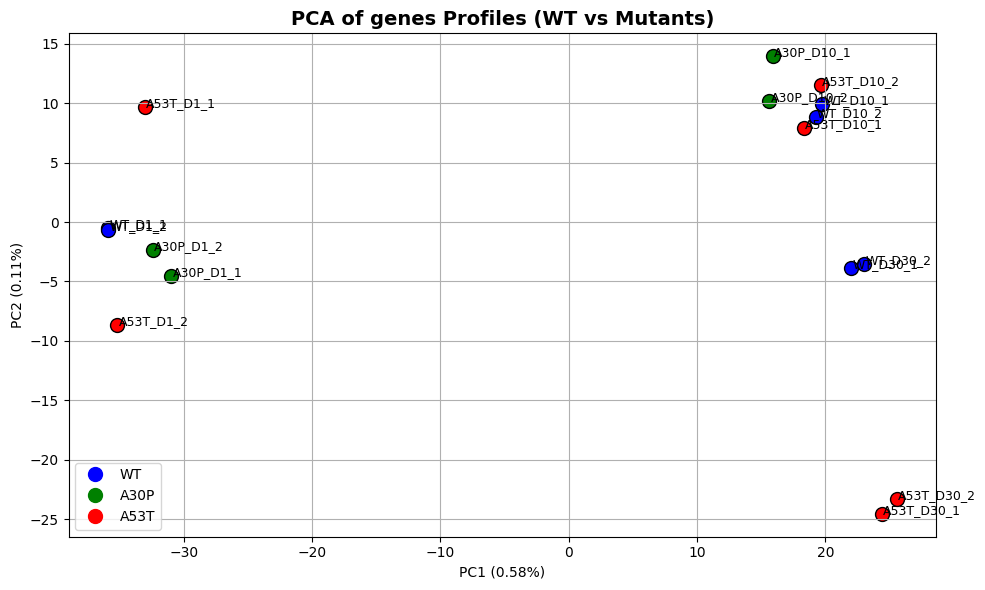

In [37]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label_group in enumerate(group_labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label_group],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        point_labels[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles (WT vs Mutants)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()